**Answer-1**
---
---

In [ ]:
import numpy as np
print(np.__version__)
import matplotlib.pyplot as plt

1.23.5


In [ ]:
# Defining a function to generate n samples such that each sample consits of (m+1) independent variables (X) & 1 dependent variable (Y)

def Generator(n,m,sigma):
  np.random.seed(100)

  e = np.random.normal(loc=0, scale=sigma, size=(n,1))        # Noise following Gaussian distribuntion
  beta = np.random.rand(m+1,1)                                # Random coefficients of linear relation

  X = np.random.rand(n, m+1)                                  # Independent variable values
  X[:, 0] = 1.0                                               # Fixing 1 in the first column

  Y = np.matmul(X, beta) + e                                  # yi = xi*β + e

  return X, Y, beta

In [ ]:
X, Y, beta = Generator(10,5,3)
print(f"X={X},\nY={Y},\nβ={beta}")

X=[[1.         0.27407375 0.43170418 0.94002982 0.81764938 0.33611195]
 [1.         0.37283205 0.00568851 0.25242635 0.79566251 0.01525497]
 [1.         0.60380454 0.10514769 0.38194344 0.03647606 0.89041156]
 [1.         0.05994199 0.89054594 0.5769015  0.74247969 0.63018394]
 [1.         0.02043913 0.21002658 0.54468488 0.76911517 0.25069523]
 [1.         0.85239509 0.97500649 0.88485329 0.35950784 0.59885895]
 [1.         0.34019022 0.17808099 0.23769421 0.04486228 0.50543143]
 [1.         0.5928054  0.62994188 0.14260031 0.9338413  0.94637988]
 [1.         0.38776628 0.363188   0.20434528 0.27676506 0.24653588]
 [1.         0.96660969 0.9570126  0.59797368 0.73130075 0.34038522]],
Y=[[-3.29802142]
 [ 2.1505048 ]
 [ 4.28945897]
 [ 0.90574939]
 [ 4.37807222]
 [ 3.29528451]
 [ 1.28079149]
 [-1.76190189]
 [ 0.20566944]
 [ 2.50264592]],
β=[[0.18532822]
 [0.10837689]
 [0.21969749]
 [0.97862378]
 [0.81168315]
 [0.17194101]]


**Answer-2**
---
---

In [133]:
#    X: An (n × m) numpy array of independent variable values
#    Y: The (n × 1) numpy array of output values
#    k: The number of iterations (epochs)
#    t: The threshold on change in cost function
#    λ: The learning rate for Gradient Descent

#    Returns the learned values of coefficients of linear relationship between X and Y

def Linear_Regression(X, Y, k, t, λ):
    X = np.hstack((np.ones((len(X),1)), X))
    Y = Y.reshape((len(X), 1))
    beta = np.random.rand(X.shape[1], 1)
    iter = 0

    while iter < k:
        error = np.matmul(X, beta) - Y
        cost = np.sum(np.square(error))/(len(Y))
        gradient = 2*(X.T.dot(error))/len(Y)
        beta = beta - λ*gradient
        new_error = np.matmul(X, beta) - Y
        new_cost = np.sum(np.square(new_error))/(2*len(Y))
        if np.abs(new_cost - cost) <= t:
            return beta
            return new_cost
        iter  += 1

    return f"β:{beta}\nThe final cost value is : {new_cost}"

In [136]:
print("Original parameters : ")
print(f"{beta}\n")
print("Learned parameters : ")
print(Linear_Regression(X, Y, 100000, 0.0001, 0.01))

Original parameters : 
[[0.73595215]
 [0.40257287]
 [0.73687293]
 [0.95950085]]

Learned parameters : 
β:[[-0.52744466]
 [-0.56442294]
 [-1.48007092]
 [-0.63043864]]
The final cost value is : 1.9350791320328282


**Answer-3**
---
---

**Effect of sample size (n) on the estimation of β coefficients** :

With a larger sample size, the linear regression algorithm has more data points to learn from, which can potentially lead to a better fit of the underlying relationship between the independent  and  dependent variables.
 However, returns may decrease with very large sample sizes, where  additional data points may not significantly improve the accuracy of the coefficients.
 Hence increasing the sample size n may lead to more accurate estimates of the β coefficients. As we can see in the plot given below.


**Effect of noise level (σ) on the estimation of β coefficients** :

Increased noise can make it more challenging for the linear regression algorithm to accurately estimate the coefficients β. As noise levels increase, the algorithm may struggle to distinguish the underlying signal from the random fluctuations introduced by noise, leading to less accurate coefficient estimates. Hence higher levels of noise represented by larger values of σ can introduce greater variability in the output vector Y, As we can clearly see the plot given below.

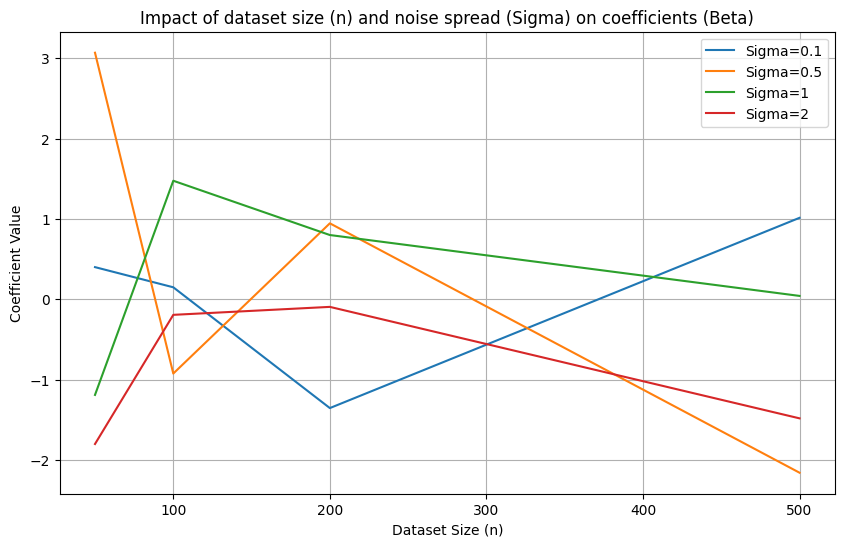

In [129]:
import numpy as np
import matplotlib.pyplot as plt

def generate_dataset(n, m, sigma):
    X = np.random.rand(n, m)
    X = np.concatenate((np.ones((n, 1)), X), axis=1)
    beta = np.random.randn(m + 1)
    e = np.random.normal(0, sigma, n)
    Y = np.dot(X, beta) + e
    return X, Y, beta

n_i = [50, 100, 200, 500]
sigma_i = [0.1, 0.5, 1, 2]
m = 2

plt.figure(figsize=(10, 6))

for sigma in sigma_i:
    beta_values = []
    for n in n_i:
        X, Y, true_beta = generate_dataset(n, m, sigma)
        new_beta = np.linalg.lstsq(X, Y, rcond=None)[0]
        beta_values.append(new_beta[1])

    plt.plot(n_i, beta_values, label=f'Sigma={sigma}')

plt.title('Impact of dataset size (n) and noise spread (Sigma) on coefficients (Beta)')
plt.xlabel('Dataset Size (n)')
plt.ylabel('Coefficient Value')
plt.legend()
plt.grid(True)
plt.show()